In [7]:
from ete3 import Tree

t = Tree("testtree_sup.tre", format=0) #format flexible with support values
#there are several methods for TreeNode-s:
#t is the whole tree, but the methods apply for any internal/leaf node:
#t.dist >> branch length, or x*1.0 distance from the farthest tip
#t.support >> bootstrap
#t.name >> name
#t.is_leaf()
#t.is_root()
#len(t) >> returns number of leaves under node
#print node #print text representation of tree
#if node in tree: >> finds out if node is part of the tree
#for leaf in t/node: >> iterate through leaves
#t.show() >> graphical tree

#if you need this:
#t.write(format=1, outfile="new_tree.nw")

print(t.ladderize(direction=1)) #does not print the tree, just leaf number
print(t.children) #= print(t.get_children()), now the tree is printed

#print(t.up)
#print(t.name)
#print(t.dist)
#print(t.is_leaf())

#NOT SURE WHAT THESE DO, THEY ALWAYS PRINT THE TREE
print(t.get_tree_root())
#print(t.children[0].get_tree_root())
#print(t.children[0].children[0].get_tree_root())

# You can also iterate over tree leaves using a simple syntax
with open("leaves.txt", "w") as result:
    for leaf in t:
        print(leaf.name)
        result.write(leaf.name + "\tsite\tabundance\n")
    
print("now going through all the nodes\n===============")
for node in t.traverse("postorder"): #left subtree, then right subtree, then root
    #preorder >> root, left, right subtree
    print(node)

print("now going through all the nodes that include Vbra6\n===============")
node = t.search_nodes(name="Vbra6")[0]
node = t&"Vbra6" #same thing
while node:
    print(node)
    node = node.up #moving towards the root


23
[Tree node '' (0x11250463), Tree node '' (0x112b8655)]

                              /-HHA1
                           /-|
                          |   \-TG1
                        /-|
                       |  |   /-PRC1
                     /-|   \-|
                    |  |      \-PF1
                  /-|  |
                 |  |   \-Cvel1
               /-|  |
              |  |   \-Vbra1
              |  |
            /-|   \-Vbra2
           |  |
           |  |      /-BBOV1
           |  |   /-|
           |   \-|   \-TP1
         /-|     |
        |  |      \-Pmar1
        |  |
        |  |      /-Vbra4
        |  |   /-|
      /-|   \-|   \-Vbra3
     |  |     |
     |  |      \-Cvel2
     |  |
     |  |      /-HHA2
   /-|  |   /-|
  |  |   \-|   \-TG2
  |  |     |
  |  |      \-EAH1
  |  |
  |   \-Pmar2
--|
  |         /-Vbra6
  |      /-|
  |     |   \-Vbra5
  |   /-|
  |  |  |   /-Pmar3
  |  |   \-|
   \-|      \-Cvel3
     |
     |   /-HHA3
      \-|
         \-TG3


(False, 'polyphyletic', {Tree node 'PF1' (0x112b8694)})

In [12]:
print(t.check_monophyly(values=["HHA1", "TG1", "PRC1", "PF1"], target_attr="name"))
print(t.check_monophyly(values=["HHA1", "TG1", "PRC1", "PF1", "Vbra1"], target_attr="name"))
print(t.check_monophyly(values=["PRC1", "PF1", "Cvel1", "Vbra1"], target_attr="name"))
#returns type of phylogenetic relationship

(True, 'monophyletic', set())
(False, 'polyphyletic', {Tree node 'Cvel1' (0x112b8632)})
(False, 'paraphyletic', {Tree node 'TG1' (0x112b862b), Tree node 'HHA1' (0x112b8647)})


In [6]:
print(t.get_leaves()) #gets a list of leaves
for leaf in t.iter_leaves(): #iterates though leaf objects
    pass
    #print(leaf)
#t.iter_descendants()

for leaf in t.iter_search_nodes(name="Vbra3"): #must match exactly, faster if you only need the first occurence
    print(leaf)
    
intnode = t.get_common_ancestor(["Vbra6", "Cvel3", "TG3"])
#intnode.show() #shows the tree in a new graphic window

[Tree node 'HHA1' (0x10c75ab7), Tree node 'TG1' (0x10c75af6), Tree node 'PRC1' (0x10c75ab0), Tree node 'PF1' (0x10c75aa2), Tree node 'Cvel1' (-0x7fffffffef38a52a), Tree node 'Vbra1' (-0x7fffffffef38a546), Tree node 'Vbra2' (-0x7fffffffef38a531), Tree node 'BBOV1' (-0x7fffffffef38a5d2), Tree node 'TP1' (0x10c75ae8), Tree node 'Pmar1' (0x10c5d440), Tree node 'Vbra4' (-0x7fffffffef3824ee), Tree node 'Vbra3' (-0x7fffffffef9547e0), Tree node 'Cvel2' (-0x7fffffffef3824e7), Tree node 'HHA2' (0x10c7db32), Tree node 'TG2' (-0x7fffffffef3824d9), Tree node 'EAH1' (0x10c7db39), Tree node 'Pmar2' (0x10c7db40), Tree node 'Vbra6' (0x10c7db6a), Tree node 'Vbra5' (0x10c7db63), Tree node 'Pmar3' (-0x7fffffffef3824a8), Tree node 'Cvel3' (-0x7fffffffef3824af), Tree node 'HHA3' (-0x7fffffffef382485), Tree node 'TG3' (-0x7fffffffef38248c)]

--Vbra3


In [17]:
t = Tree("testtree_sup.tre", format=0)
highsupport = t.search_nodes(support=0.85) #as with names, exact match required :/
#but check:

def conditional_function(node):
    if node.support > 0.85 and node.is_leaf() == False: 
        #note that 1.0 is a default value for undefined nodes
        return True
    else:
        return False

matches = filter(conditional_function, t.traverse()) 
#it is a little inconvenient to work with filter() iterator, 
#see below how to do the same using a function
names = []
for i in matches:
    names.append(i.name)
    print(i.support)

print(len(names), "nodes that have support >0.3")


1.0
0.87
0.87
0.98
0.98
1.0
0.87
0.88
0.86
0.96
0.92
11 nodes that have support >0.3


In [5]:
#for more complex filters one can also use the Lambda function:
#note that leaves do not have support
matches = filter(lambda n: n.dist>0.3 and n.is_leaf(), t.traverse() )
names = [x.name for x in matches]
print(len(names), "nodes that have distance >0.3 and are leaves")

15 nodes that have distance >0.3 and are leaves


In [15]:
#a fx to find nodes with a given (or larger) size
#replacement for the filter()
def search_by_size(node, size):
    "Finds nodes with a given number of leaves"
    matches = []
    for n in node.traverse():
       if len(n) == size: # > for larger nodes
          matches.append(n)
    return matches

# returns nodes containing 6 leaves
search_by_size(t, size=6)

[Tree node '' (-0x7fffffffeed475e7), Tree node '' (0x112b8ab7)]

In [4]:
#now a similar function for filtering by support
def find_supported(node, support):
    "Find nodes with significant support"
    matches = []
    for n in node.traverse():
        if n.support > support and n.is_leaf() == False and n.is_root() == False: 
            matches.append(n)
            n.add_features(name="SUP")
    return matches

t = Tree("testtree_sup.tre", format=0)
find_supported(t, support=0.85) #find non-terminal nodes with high support
print(t.get_ascii(attributes=["name", "support"])) #draw tree, set attributes to show

#t.show(attributes=["name", "support"]) #this needs fixing


                                                                          /-PF1, 1.0
                                                                 /SUP, 0.96
                                                                |         \-PRC1, 1.0
                                                           /, 0.81
                                                          |     |         /-TG1, 1.0
                                                  /SUP, 0.86     \SUP, 0.92
                                                 |        |               \-HHA1, 1.0
                                         /SUP, 0.87       |
                                        |        |         \-Cvel1, 1.0
                                   /, 0.65       |
                                  |     |         \-Vbra1, 1.0
                                  |     |
                             /, 0.73     \-Vbra2, 1.0
                            |     |
                            |     |               /-TP1, 1.0

# script for a tree drawing engine

{'1': '#440154', '4': '#3b528b', '2': '#21918c', '5': '#5ec962', '3': '#fde725'}
Pmar2 4 354
HHA3 1 167
TG3 1 2040
EAH1 4 11
Vbra6 4 54
Vbra5 5 23
Pmar3 5 7678
Cvel3 1 34
Cvel2 1 734
HHA2 2 180
TG2 4 1870
Vbra2 2 2353
Pmar1 3 23221
Vbra4 3 3245
Vbra3 1 765
Vbra1 2 124
BBOV1 3 5235
TP1 3 14000
Cvel1 2 453
HHA1 1 150
TG1 1 1500
PRC1 1 34
PF1 2 7635


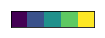

{'faces': [[524.1759743486829,
   240.921560841926,
   538.8161505513172,
   273.8619572978533,
   10,
   'HHA1'],
  [588.1530994644705,
   256.8156981069428,
   608.3832198773424,
   284.08287719271465,
   11,
   'TG1'],
  [665.7701391959691,
   242.05531259702175,
   694.4288068505981,
   277.97963741488064,
   13,
   'PRC1'],
  [726.765236790991,
   294.7482791695982,
   753.2865763668515,
   321.6819590000499,
   14,
   'PF1'],
  [717.8935515421925,
   386.4660950670133,
   752.503440164413,
   415.89261982889354,
   15,
   'Cvel1'],
  [739.3525623127455,
   444.8815911613699,
   775.2214813881407,
   469.1061582147826,
   16,
   'Vbra1'],
  [774.7977611200332,
   505.26864539036103,
   808.6604468650183,
   522.1226241145174,
   17,
   'Vbra2'],
  [783.6009610408081,
   570.9693214576682,
   827.0470166320852,
   592.8801648574945,
   20,
   'BBOV1'],
  [789.6229552713891,
   645.4430972208987,
   816.8052589126792,
   668.4516115022523,
   21,
   'TP1'],
  [685.122280301426,
   6

In [6]:
#make a pallette of colours for a set of locations
from ete3 import Tree, TreeStyle, TextFace, NodeStyle
import csv
import matplotlib.pyplot as plt
import matplotlib
import math

#################
### FUNCTIONS ###
#################

def get_cmap(n, name='viridis'): #hsv for very divergent data?
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    colormap = plt.cm.get_cmap(name, n)
    rgbcolors = []
    for i in range(colormap.N):
        rgb = colormap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        rgbcolors.append(matplotlib.colors.rgb2hex(rgb))
    return rgbcolors

def find_supported(node, support):
    "Find nodes with significant support"
    matches = []
    for n in node.traverse():
        if n.support > support and n.is_leaf() == False and n.is_root() == False: 
            matches.append(n)
            n.add_features(name="SUP")
    return matches

def nodeshape_size(actual):
    node_size = math.log10(actual) // 1 + 1
    return node_size*3

#################
### DATA READ ###
#################
t = Tree("testtree_sup.tre", format=0) #format flexible with support values
t.ladderize(direction=1)

#select scale 0-1.0 or 0-100 for support values
supportscache = t.get_cached_content(store_attr="support")
supportslist = [x.support for x in supportscache]
if max(supportslist) == 1:
    minsupport = 0.85
else:
    minsupport = 85
find_supported(t, support=minsupport) #find non-terminal nodes with high support

EnvDataFile = csv.reader(open("leaves_data.txt"), delimiter="\t", skipinitialspace=True)

##################
###    MAIN    ###
##################
#create a dictionary of taxon data and a list of all localities
envdata = {}
location = set()
abundances = set()
for row in EnvDataFile:
    envdata[row[0]] = {"Locality": row[1], "Abundance": row[2]}
    location.add(row[1])
    abundances.add(row[2])
minmax = (min(abundances), max(abundances))
#print(location)
list(location).sort()

#assign colors to localities
N = len(location)
cmap = get_cmap(N)
colors = {}
for i, X in enumerate(location):
    colors[X] = cmap[i] #hopefully this is still recognized as a color
print(colors)
    
for key in envdata:
    locality = envdata[key]["Locality"]
    envdata[key].update({"Color": colors[locality]})

#set different graphic styles:
othersupport, fullsupport, highsupport, leaf = NodeStyle(), NodeStyle(), NodeStyle(), NodeStyle()
fullsupport["hz_line_width"] = 5
fullsupport["size"] = 0
highsupport["hz_line_width"] = 5
highsupport["hz_line_color"] = "#666666"
highsupport["size"] = 0
othersupport["size"] = 0

#define tree style
ts = TreeStyle()
ts.show_leaf_name = True
ts.min_leaf_separation = 1
#ts.show_branch_length = True
ts.show_branch_support = True
ts.scale =  200 # 100 pixels per branch length unit
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
ts.title.add_face(TextFace("Diatom Tree", fsize=20), column=0)
circular_style = TreeStyle()
circular_style.mode = "c" # draw tree in circular mode
circular_style.scale = 100
circular_style.arc_start = -90 # 0 degrees = 3 o'clock
circular_style.arc_span = 330


#now for something completely different, tree traverse
for node in t.traverse():
    if node.is_leaf():
        node.add_features(color=envdata[node.name]["Color"], 
                          abundance=envdata[node.name]["Abundance"])
        node.img_style["size"] = nodeshape_size(int(envdata[node.name]["Abundance"]))
        node.img_style["fgcolor"] = envdata[node.name]["Color"]
        #node.set_style(leaf)
        print(node.name, envdata[node.name]["Locality"], envdata[node.name]["Abundance"])
    elif node.name == "SUP":
        if node.support == 1:
            node.set_style(fullsupport)
        else:
            node.set_style(highsupport)
    else:
        node.set_style(othersupport)
#to check tree is annotated:
#print(t.get_ascii(attributes=["name", "abundance"], show_internal=True)) 
#color and abundance are new features


#generate a scale bare with colours
fig=plt.figure(figsize=(1.5,N*1.5))
ax=fig.add_subplot(111)   
plt.axis('scaled')
ax.set_xlim([ 0, N])
ax.set_ylim([-0.5, 0.5])
for i in range(N):
    rect = plt.Rectangle((i, -0.5), 1, 1, facecolor=cmap[i])
    ax.add_artist(rect)
ax.set_yticks([])
ax.set_xticks([])
plt.show()

#ts.legend.add_face(fig, column=0) #does not work
#t.show(tree_style=ts)
t.render("mytree_c.png", w=300, units="mm", tree_style=circular_style)

# Tree for marking leaves according to localization

In [15]:
#make a pallette of colours for a set of locations
from ete3 import Tree, TreeStyle, TextFace, NodeStyle
import csv


#################
### FUNCTIONS ###
#################

def find_supported(node, support):
    "Find nodes with significant support"
    matches = []
    for n in node.traverse():
        if n.support >= support and n.is_leaf() == False and n.is_root() == False: 
            matches.append(n)
            n.add_features(name="SUP")
    return matches

def tag_replace(string):
    tag = string.split("_")[0]
    if tag in taxarepl9:
        string = string.replace(tag, taxarepl9[tag])
    return string
    
#################
### DATA READ ###
#################
filename = "UROS_iq"
#################
t = Tree(filename + ".treefile", format=0) #format flexible with support values

#set the ancestors here
ancestors_d = {"Clade1": ["cyanANABv_WP_011317903.1_plastoquinolTOX", 
                          "grnPRASc_MMETSP0941_Gene.14464-Transcript_5625_Chlorophyta_Prasinococcales"],
               "Clade2": ["crypGONIp_MMETSP0107_Gene.30083-Transcript_20766_Cryptophyta_Cryptomonadales",
                          "Phenylobacterium_sp._RIFCSPHIGHO2_01_FULL_69_31_OHB27812.1"],
               "UROS_iq": ["Pyrobaculum_islandicum_WP_011761876",
                          "Sulfurisphaera_tokodaii_WP_010978159"]
              }
try:
    ancestor = t.get_common_ancestor(ancestors_d[filename])
    t.set_outgroup(ancestor)
except KeyError:
    print("Root not selected!")
    print(t.get_tree_root())
    quit()
t.ladderize(direction=0)

#select scale 0-1.0 or 0-100 for support values
supportscache = t.get_cached_content(store_attr="support")
supportslist = [x.support for x in supportscache]
if max(supportslist) == 1:
    minsupport = 0.85
else:
    minsupport = 85
find_supported(t, support=minsupport) #find non-terminal nodes with high support

#load additional data    
LocDataFile = csv.reader(open("4pred-preds.txt"), delimiter="\t", skipinitialspace=True)

taxareplfile = csv.reader(open("taxarepl9.tsv"), delimiter="\t", skipinitialspace=False)
taxarepl9 = {}
for row in taxareplfile:
    taxarepl9[row[0]] = row[1]
    
##################
###    MAIN    ###
##################
#create a dictionary of taxon data and a list of all localities
locdata = {}
localization = set()

for row in LocDataFile:
    locdata[row[0]] = row[2]
    localization.add(row[2])

#print(location)
list(localization).sort()

#assign colors to localities
N = len(localization)
colors = {"MT": "dodgerblue", "PT": "mediumseagreen", "dual": "darkviolet", 
          "CS": "black", "amb": "black", 
          "SP": "black", "no pred": "black"}
#automatic assignment:
#cmap = get_cmap(N)
#colors = {}
#for i, X in enumerate(localization):
#    colors[X] = cmap[i] #hopefully this is still recognized as a color
print(colors)


#set different graphic styles:
othersupport, fullsupport, highsupport, leaf = NodeStyle(), NodeStyle(), NodeStyle(), NodeStyle()
fullsupport["hz_line_width"] = 1 #or 5
fullsupport["size"] = 0
#fullsupport["extra_branch_line_type"] = 2 #the extra branches need to be adjusted still

highsupport["hz_line_width"] = 1 #or 5
highsupport["hz_line_color"] = "#000000" #or "#666666" for grey
highsupport["size"] = 0
#highsupport["extra_branch_line_type"] = 2 #the extra branches need to be adjusted still
othersupport["size"] = 0

#define tree style
ts = TreeStyle()
ts.show_leaf_name = True
ts.min_leaf_separation = 1
#ts.show_branch_length = True
ts.show_branch_support = True
ts.scale =  200 # 100 pixels per branch length unit
ts.min_leaf_separation = 0.5
ts.branch_vertical_margin = 0 # 10 pixels between adjacent branches
ts.title.add_face(TextFace(filename, fsize=20), column=0)
circular_style = TreeStyle()
circular_style.mode = "c" # draw tree in circular mode
circular_style.scale = 100
circular_style.arc_start = -90 # 0 degrees = 3 o'clock
circular_style.arc_span = 330


#now for something completely different, tree traverse
for node in t.traverse():
    if node.is_leaf():
        local = locdata.get(node.name, "no pred")
        leafcolor = colors.get(local, "black")
        node.add_features(color=leafcolor)
        node.img_style["size"] = 0
        node.img_style["fgcolor"] = leafcolor
        node.img_style["vt_line_color"] = leafcolor
        node.img_style["hz_line_color"] = leafcolor
        node.img_style["hz_line_width"] = 1
        node.name = tag_replace(node.name).replace("_"," ") #make s
        #print(node.name)
        #node.set_style(leaf)
        #print(node.name, local)
    elif node.name == "SUP":
        if node.support == 100:
            node.set_style(fullsupport)
        else:
            node.set_style(highsupport)
    else:
        node.set_style(othersupport)
#to check tree is annotated:
#print(t.get_ascii(attributes=["name", "abundance"], show_internal=True)) 
#color and abundance are new features


#ts.legend.add_face(fig, column=0) #does not work
#t.show(tree_style=ts)
t.render(filename + "_c.pdf", w=400, units="mm", tree_style=ts)

{'MT': 'dodgerblue', 'PT': 'mediumseagreen', 'dual': 'darkviolet', 'CS': 'black', 'amb': 'black', 'SP': 'black', 'no pred': 'black'}


{'faces': [[1.5433351884837396,
   305.18352416596065,
   9.260011130902438,
   319.0735408623143,
   0,
   '1'],
  [58.3197044359424,
   25.465030609981703,
   79.92639707471476,
   39.35504730633536,
   1,
   '100'],
  [522.0381034024728,
   1.5433351884837396,
   790.5784261986433,
   20.063357450288613,
   2,
   'Sulfurisphaera tokodaii WP 010978159'],
  [124.23153766459285,
   38.58337971209349,
   138.1215543609465,
   52.473396408447144,
   3,
   '41'],
  [537.521709120784,
   20.063357450288613,
   813.7787078593734,
   38.58337971209349,
   4,
   'Pyrobaculum islandicum WP 011761876'],
  [452.08967121626955,
   38.58337971209349,
   739.1500162742451,
   57.103401973898364,
   5,
   'Thermoplasma volcanium WP 010916891'],
  [58.3197044359424,
   586.4453529104234,
   79.92639707471476,
   600.335369606777,
   6,
   '100'],
  [124.369820497481,
   136.49850229278576,
   138.25983719383467,
   150.3885189891394,
   7,
   '59'],
  [349.59551522774245,
   81.02509739539633,
   371

In [5]:
t = Tree("testtree_sup.tre", format=0)
supportscache = t.get_cached_content(store_attr="support")
supportslist = [x.support for x in supportscache]
if max(supportslist) == 1:
    minsupport = 0.85
else:
    minsupport = 85
print(minsupport)  
find_supported(t, support=minsupport) #find non-terminal nodes with high support
                              #make sure this is not 0-1 but 0-100

0.85


[Tree node 'SUP' (0x103297a2),
 Tree node 'SUP' (0x1032e8cc),
 Tree node 'SUP' (-0x7fffffffefcd0a77),
 Tree node 'SUP' (-0x7fffffffefcd17cb),
 Tree node 'SUP' (0x1032e8e1),
 Tree node 'SUP' (-0x7fffffffefcd0aaf),
 Tree node 'SUP' (-0x7fffffffefcd0a70),
 Tree node 'SUP' (0x1032f524),
 Tree node 'SUP' (0x1032f532),
 Tree node 'SUP' (0x1032f540)]

In [5]:
import math
math.log10(50000) // 1 + 1

5.0

In [ ]:
#compare trees using t.compare and t.robinson_foulds()
t1 = Tree('(((a,b),c), ((e, f), g));')
t2 = Tree('(((a,c),b), ((e, f), g));') #reference tree!
compare_d = t1.compare(t2, unrooted=False)
rf, max_rf, common_leaves, parts_t1, parts_t2 = t1.robinson_foulds(t2)

#get distance:
t&"A".get_distance("C")
t.get_distance("A","C")

In [ ]:
#TREE MODIFICATIONS
#removing nodes:
removed_node = node.detach() #remove node with all descendants, sister clade will be placed here
# same as: parent.remove_child(node) 
node.delete() #remove node only, descendants will be placed here

#pruning:
t.prune(["H","F","E","Q", "P"], preserve_branch_length=True) # will only keep there leaves and their relationships

#concatenating:
A = t1.search_nodes(name='ROOT')[0]
# and adds the two other trees as children.
A.add_child(t2)
A.add_child(t3)

#setting a root:
ancestor = t.get_common_ancestor("E","D")
t.set_outgroup(ancestor)

In [74]:
#generate file with the tree
t.render("graphical_tree.png",units='px',dpi=90) #w=WIDTH, h=HEIGHT

{'faces': [[138.7508697115924, 1.0, 157.7508697115924, 13.0, 10, 'PF1'],
  [141.16474020873076, 13.0, 168.16474020873076, 25.0, 11, 'PRC1'],
  [124.94984748166209, 25.0, 144.9498474816621, 37.0, 13, 'TG1'],
  [126.47125615939441, 37.0, 153.47125615939441, 49.0, 14, 'HHA1'],
  [108.56028810152927, 49.0, 134.56028810152927, 61.0, 15, 'Cvel1'],
  [103.81622305424348, 61.0, 130.8162230542435, 73.0, 16, 'Vbra1'],
  [108.1358790463268, 73.0, 135.1358790463268, 85.0, 17, 'Vbra2'],
  [126.04742861223616, 85.0, 145.04742861223616, 97.0, 20, 'TP1'],
  [116.13669519796778, 97.0, 150.13669519796778, 109.0, 21, 'BBOV1'],
  [91.56749063976088, 109.0, 121.56749063976088, 121.0, 22, 'Pmar1'],
  [107.09054182267064, 121.0, 134.09054182267064, 133.0, 25, 'Vbra3'],
  [101.37584803256445, 133.0, 128.37584803256445, 145.0, 26, 'Vbra4'],
  [90.71463257873313, 145.0, 116.71463257873313, 157.0, 27, 'Cvel2'],
  [100.06941369706492, 157.0, 120.06941369706492, 169.0, 30, 'TG2'],
  [98.20506830169046, 169.0, 125.

In [16]:
#a snippet to collapse leaves with same labels
def collapsed_leaf(node):
    #print(node, node2labels[node])
    if len(node2labels[node]) == 1:
       return True
    else:
       return False

t = Tree("((((a,a,a)a,a)aa, (b,b)b)ab, (c, (d,d)d)cd);", format=1)
print(t)
# We create a cache with every nodes' leaf list (or other data)
node2labels = t.get_cached_content(store_attr="name") #pool info on all leaves
print(type(node2labels))
print(node2labels)
t2 = Tree( t.write(is_leaf_fn=collapsed_leaf) )
print(t2) #nodes grouping the same tip labels are collapsed


            /-a
           |
         /-|--a
        |  |
      /-|   \-a
     |  |
   /-|   \-a
  |  |
  |  |   /-b
--|   \-|
  |      \-b
  |
  |   /-c
   \-|
     |   /-d
      \-|
         \-d
<class 'dict'>
{Tree node 'a' (0x11442dfd): {'a'}, Tree node 'a' (-0x7fffffffeebbd223): {'a'}, Tree node 'a' (-0x7fffffffeebbd277): {'a'}, Tree node 'a' (0x11442dcc): {'a'}, Tree node 'a' (0x11442d24): {'a'}, Tree node 'aa' (-0x7fffffffeebbd27e): {'a'}, Tree node 'b' (0x11442d78): {'b'}, Tree node 'b' (-0x7fffffffeebbc2c4): {'b'}, Tree node 'b' (-0x7fffffffeebbd2d2): {'b'}, Tree node 'ab' (-0x7fffffffeebbd262): {'a', 'b'}, Tree node 'c' (0x11443d63): {'c'}, Tree node 'd' (0x11443d2b): {'d'}, Tree node 'd' (-0x7fffffffeebbc293): {'d'}, Tree node 'd' (-0x7fffffffeebbc23f): {'d'}, Tree node 'cd' (-0x7fffffffeebbd2d9): {'c', 'd'}, Tree node '' (-0x7fffffffeebbd20e): {'a', 'b', 'c', 'd'}}

      /-aa
   /-|
  |   \-b
--|
  |   /-c
   \-|
      \-d
